# R Data Wrangling
Political campaign contributions from individuals for Presidential 2016 election primary.

The data is publically available here: https://classic.fec.gov/finance/disclosure/ftpdet.shtml#a2015_2016
Primary results, county facts, and county facts dictionary files (which are used in parts seven and eight) are attached in this project folder. 

### Loading Data

In [1]:
ind <- get(load(file='camp.Rdata'))

### Exploring Data

In [2]:
summary(ind)

   CMTE_ID           AMNDT_IND            RPT_TP            IMAGE_NUM        
 Length:7845344     Length:7845344     Length:7845344     Min.   :1.502e+10  
 Class :character   Class :character   Class :character   1st Qu.:2.016e+17  
 Mode  :character   Mode  :character   Mode  :character   Median :2.016e+17  
                                                          Mean   :1.979e+17  
                                                          3rd Qu.:2.016e+17  
                                                          Max.   :2.017e+17  
                                                                             
  ENTITY_TP             CITY              STATE              ZIP_CODE        
 Length:7845344     Length:7845344     Length:7845344     Min.   :        0  
 Class :character   Class :character   Class :character   1st Qu.:    94539  
 Mode  :character   Mode  :character   Mode  :character   Median :287159557  
                                                          Mean  

In [3]:
head(ind)

CMTE_ID,AMNDT_IND,RPT_TP,IMAGE_NUM,ENTITY_TP,CITY,STATE,ZIP_CODE,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,SUB_ID
C00004606,N,M4,15951124869,IND,MCPHERSON,KS,67460,OPTOMETRIST,03102015,1000,NA,SA11AI.20747,1002259,4.04132e+18
C00004606,N,M4,15951124869,IND,HAYS,KS,67601,RETIRED,03302015,1000,NA,SA11AI.20772,1002259,4.04132e+18
C00004606,N,M4,15951124869,IND,OLATHE,KS,66051,BUSINESSMAN,03302015,250,NA,SA11AI.20759,1002259,4.04132e+18
C00452383,N,M4,15951124897,IND,FREDERICK,MD,21704,NA,03112015,500,NA,SA11AI.25088,1002261,4.04132e+18
C00452383,N,M4,15951124897,IND,VERO BEACH,FL,329600595,NA,03022015,250,NA,SA11AI.25074,1002261,4.04132e+18
C00452383,N,M4,15951124898,IND,BUELLTON,CA,934279421,HOMEMAKER,03022015,200,NA,SA11AI.25072,1002261,4.04132e+18


### Setting up Magrittr and other packages

In [4]:
options(stringsAsFactors = FALSE)
library(dplyr)
library(readr)
library(lubridate)
library(purrr)
library(ggplot2)
library(stringr)
library(scales)
library(rpart)
library(caret)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date


Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor

Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift



In [5]:
library(rpart.plot)

In [6]:
install.packages('ranger', repos='http://cran.us.r-project.org')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [7]:
library(ranger) 

In [8]:
install.packages('e1071', repos='http://cran.us.r-project.org')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [9]:
library(e1071)

In [10]:
install.packages('Metrics', repos='http://cran.us.r-project.org')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [11]:
library(Metrics)


Attaching package: ‘Metrics’

The following objects are masked from ‘package:caret’:

    precision, recall



## 1. Most Popular Occupations
##### Top Ten Most Popular Occupations
The top 10 most popular occupations include N/A. Which for purposes of the graphing of the occupations N/A will be dropped, however it will not be dropped from overall dataframe for further analysis because it contains not insignificant amount of observations. 

In [12]:
ind %>%
  group_by(OCCUPATION) %>%
  summarize(obs = n()) -> popular10

popular10 %>%
  arrange(desc(obs)) -> popular10
head(popular10,10)

OCCUPATION,obs
RETIRED,1395291
NOT EMPLOYED,445270
NA,233577
ATTORNEY,218338
PHYSICIAN,119498
HOMEMAKER,91630
ENGINEER,89488
PRESIDENT,75281
LABORER,69682
TEACHER,66786


### Remove N/A

In [13]:
ind %>%
  filter(!is.na(OCCUPATION)) %>%
  group_by(OCCUPATION) %>%
  summarize(obs = n()) -> popular10

popular10 %>%
  arrange(desc(obs)) -> popular10
head(popular10,10)

OCCUPATION,obs
RETIRED,1395291
NOT EMPLOYED,445270
ATTORNEY,218338
PHYSICIAN,119498
HOMEMAKER,91630
ENGINEER,89488
PRESIDENT,75281
LABORER,69682
TEACHER,66786
CONSULTANT,63065


### Data entered in OCCUPATIONS column
Here, if we just look through the occupations (i.e. provided is randomly selected 20 occupations), there are a lot of misspellings and some even make no sense. Therefore, the results will not be very accurate for top 10 most popular occupations. 
Clearly, the occupation is inputted as a plain text, which is not very helpful for data analysis. It would be much better if occupations were selected from the drop down list.

In [14]:
sample(table(ind$OCCUPATION),20)


          ENVIRONMENTAL REMEDIATION LD                REGIONAL REPRESENTATIVE 
                                     6                                    181 
           ENGINEERING MANAGER - FUELS SENIOR HEALTH SYSTEMS DISTRICT BUSINES 
                                    16                                      6 
                ANALYST FREIGHT CLAIMS              JUNIOR COLLEGE INSTRUCOTR 
                                    10                                      1 
           INSURANCE/WEALTH MANAGEMENT                            RECORDS MGR 
                                     1                                      1 
  PUBLIC POLICY AND GOVERNMENT AFFAIRS                         GTR CDL DRIVER 
                                     1                                      1 
                        IT CONSULTANTS                       DIVISIONAL RX VP 
                                     1                                      4 
                             OWNER,COO         PROD

### Top Six Most Popular Occupations
Below, are narrowed down to top six most popular occupations omitting N/A.

In [15]:
head(popular10,6) -> popular6
popular6

OCCUPATION,obs
RETIRED,1395291
NOT EMPLOYED,445270
ATTORNEY,218338
PHYSICIAN,119498
HOMEMAKER,91630
ENGINEER,89488


### Plot of Top Six Most Common Occupation Donation

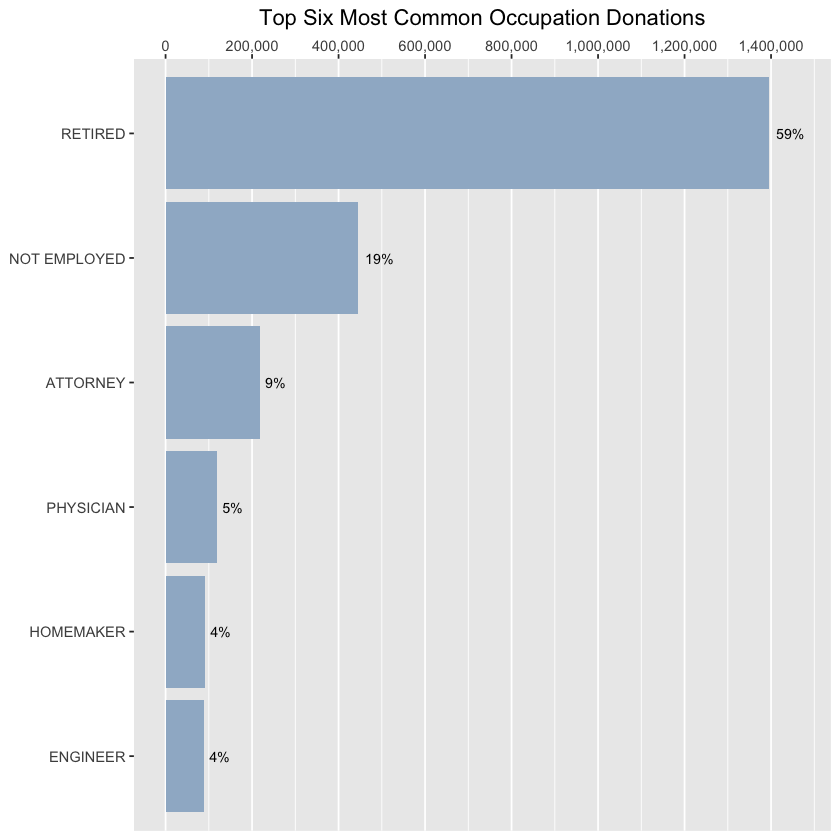

In [16]:
popular6 <- transform(popular6, OCCUPATION = reorder(OCCUPATION, obs))
#options(repr.plot.width=6, repr.plot.height=20)
ggplot(popular6, aes(x = reorder(as.character(OCCUPATION), obs), y=obs)) + 
  geom_bar(stat="identity", fill = "slategray3")+
  labs(x = "Occupation")+
  coord_flip() + 
  labs(title = "Top Six Most Common Occupation Donations")+
  theme(plot.title = element_text(hjust = 0.5), axis.title.x = element_blank(), axis.title.y = element_blank(), panel.grid.major.y = element_blank(),
        panel.grid.minor.y = element_blank())+
  geom_text(aes(label = sprintf("%.0f%%", round((obs)/sum(obs) * 100))),
            position = position_dodge(width = 0.9), hjust = -0.25, size = 3) +
  scale_y_continuous(label=comma,  position = "right", breaks = scales::pretty_breaks(n = 10), limits = c(0, 1.05 * max(popular6$obs)))

### Analysis
The majority of donors are retired people, which are an older sector of the population. Retired people are most likely donate by check compared to other age groups that donate primarily online, so their donation habits are different compared to other occupations. Therefore, it might take longer for the donations to come since retired people make up more than half of the top six occupations; so candidates experience the problem of lagging funds.

### Interesting
N/A, Not Employed, and Homemaker could possibly be combined, because these categorizations are based on people's perspectives and definitions of what it means to be a housewife or househusband. Some people would classify as N/A - meaning the occupation is not applicable if you are staying at home. Some people would consider staying at home as not employed, and some would chose homemaker as an occupation. 

## 2. Joining and Cleaning
These functions will help read the files and add the names to the columns faster.

In [17]:
add_names <- function(df, file) {
  names(df) <- names(read.csv(file))
  df
}

read_fec <- function(file) {
  read.csv(file, sep = '|', skipNul = T, na.strings = '', header = F, quote = "")
}

### Primary Candidate data 
I imported primary candidate data and the column names particularly for candidates' id, name, election year, political affiliation, and office. At the same time I filtered on "P" to get just the Presidential candidates.  

In [18]:
'cn.txt' %>%
  read_fec %>%
  add_names('cn_header_file.csv') %>%
  select(CAND_ID, CAND_NAME, CAND_ELECTION_YR, CAND_PTY_AFFILIATION, CAND_OFFICE) %>%
  filter(CAND_OFFICE == 'P') %>%
  select(-CAND_OFFICE) -> cand

dim(cand)
head(cand)

[1] 2300    4

CAND_ID,CAND_NAME,CAND_ELECTION_YR,CAND_PTY_AFFILIATION
P00000679,"CARROLL, JERRY LEON",2016,NNE
P00000729,"MUZYK, GEORGE ALEXANDER",2000,DEM
P00001099,"MARCINEK, ALOYSIUS R",2016,IND
P00002295,"BYERLEY, LESTER F JR",2012,OTH
P00003160,"WELLS, THOMAS BAXTER",2016,OTH
P00003236,"PRATTAS, JAMES",2012,REP


### Link candidates to committee
I imported primary candidate data and the column names particularly for candidates' id, election year, and committee id. This information will be helpful in the next step.  

In [19]:
'ccl.txt' %>%
  read_fec %>%
  add_names('ccl_header_file.csv') %>%
  select(CAND_ID, CAND_ELECTION_YR, CMTE_ID) -> link

dim(link)
head(link)

[1] 6425    3

CAND_ID,CAND_ELECTION_YR,CMTE_ID
C00008227,2016,C00623207
C00027466,2016,C00623207
C00042366,2016,C00624478
C00075820,2016,C00624825
C00099267,2016,C00623611
C00140590,2016,C00624825


In [20]:
cand %>%
  inner_join(link, by = c("CAND_ID", "CAND_ELECTION_YR")) -> df

dim(df)
head(df)

[1] 1104    5

CAND_ID,CAND_NAME,CAND_ELECTION_YR,CAND_PTY_AFFILIATION,CMTE_ID
P00000679,"CARROLL, JERRY LEON",2016,NNE,C00214999
P00000729,"MUZYK, GEORGE ALEXANDER",2000,DEM,C00283325
P00002295,"BYERLEY, LESTER F JR",2012,OTH,C00497636
P00003160,"WELLS, THOMAS BAXTER",2016,OTH,C00571224
P00003236,"PRATTAS, JAMES",2012,REP,C00497107
P00003236,"PRATTAS, JAMES",2012,REP,C00432898


### Link candidates to individuals
This is an important step of joining df and ind dataframes to get a complete data set for further cleaning and analysis.

In [21]:
df %>%
  inner_join(ind, by = "CMTE_ID") -> df

dim(df)
head(df)

[1] 2588757      19

CAND_ID,CAND_NAME,CAND_ELECTION_YR,CAND_PTY_AFFILIATION,CMTE_ID,AMNDT_IND,RPT_TP,IMAGE_NUM,ENTITY_TP,CITY,STATE,ZIP_CODE,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,SUB_ID
P00003392,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",2016,DEM,C00575795,A,Q2,2.01509e+17,IND,MCLEAN,VA,221021431,RETIRED,04282015,2700,NA,C81053,1024052,4.09092e+18
P00003392,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",2016,DEM,C00575795,A,Q2,2.01509e+17,IND,FAYETTEVILLE,AR,727011611,ATTORNEY,05072015,201,NA,C113873,1024052,4.09092e+18
P00003392,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",2016,DEM,C00575795,A,Q2,2.01509e+17,IND,WASHINGTON,DC,200094582,PRESIDENT,04122015,250,NA,C6563,1024052,4.09092e+18
P00003392,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",2016,DEM,C00575795,A,Q2,2.01509e+17,IND,LOS ANGELES,CA,900691401,AGENT / HEAD OF MUSIC,05012015,2700,NA,C92433,1024052,4.09092e+18
P00003392,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",2016,DEM,C00575795,A,Q2,2.01509e+17,IND,DALLAS,TX,752143452,REAL ESTATE,05072015,2700,NA,C113903,1024052,4.09092e+18
P00003392,"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",2016,DEM,C00575795,A,Q2,2.01509e+17,IND,ATLANTA,GA,303271800,CFO,04282015,2700,NA,C82313,1024052,4.09092e+18


### Clean
Not Useful Columns: CAND_ID, CMTE_ID, AMNDT_IND, RPT_TP, IMAGE_NUM, CITY, ZIP_CODE, OTHER_ID, TRAN_ID, FILE_NUM, SUB_ID    

Useful Columns: CAND_NAME, CAND_ELECTION_YR, CAND_PTY_AFFILIATION, ENTITY_TP, STATE, OCCUPATION, TRANSACTION_DT, TRANSACTION_AMT

### Select Relevant Columns

In [22]:
df %>%
  select(CAND_NAME, CAND_ELECTION_YR, CAND_PTY_AFFILIATION, ENTITY_TP, STATE, OCCUPATION, TRANSACTION_DT, TRANSACTION_AMT) -> df

dim(df)
head(df)

[1] 2588757       8

CAND_NAME,CAND_ELECTION_YR,CAND_PTY_AFFILIATION,ENTITY_TP,STATE,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT
"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",2016,DEM,IND,VA,RETIRED,04282015,2700
"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",2016,DEM,IND,AR,ATTORNEY,05072015,201
"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",2016,DEM,IND,DC,PRESIDENT,04122015,250
"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",2016,DEM,IND,CA,AGENT / HEAD OF MUSIC,05012015,2700
"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",2016,DEM,IND,TX,REAL ESTATE,05072015,2700
"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",2016,DEM,IND,GA,CFO,04282015,2700


### Filter missing dates and format dates

In [23]:
df %>%
  filter(!is.na(TRANSACTION_DT)) %>%
  mutate(date = as.Date(mdy(TRANSACTION_DT))) %>%
  select(-TRANSACTION_DT) ->df

dim(df)
head(df)

[1] 2588757       8

CAND_NAME,CAND_ELECTION_YR,CAND_PTY_AFFILIATION,ENTITY_TP,STATE,OCCUPATION,TRANSACTION_AMT,date
"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",2016,DEM,IND,VA,RETIRED,2700,2015-04-28
"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",2016,DEM,IND,AR,ATTORNEY,201,2015-05-07
"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",2016,DEM,IND,DC,PRESIDENT,250,2015-04-12
"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",2016,DEM,IND,CA,AGENT / HEAD OF MUSIC,2700,2015-05-01
"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",2016,DEM,IND,TX,REAL ESTATE,2700,2015-05-07
"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",2016,DEM,IND,GA,CFO,2700,2015-04-28


### Filter missing candidates

In [24]:
df %>%
  filter(!is.na(CAND_NAME)) ->df

dim(df)
head(df)

[1] 2588757       8

CAND_NAME,CAND_ELECTION_YR,CAND_PTY_AFFILIATION,ENTITY_TP,STATE,OCCUPATION,TRANSACTION_AMT,date
"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",2016,DEM,IND,VA,RETIRED,2700,2015-04-28
"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",2016,DEM,IND,AR,ATTORNEY,201,2015-05-07
"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",2016,DEM,IND,DC,PRESIDENT,250,2015-04-12
"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",2016,DEM,IND,CA,AGENT / HEAD OF MUSIC,2700,2015-05-01
"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",2016,DEM,IND,TX,REAL ESTATE,2700,2015-05-07
"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",2016,DEM,IND,GA,CFO,2700,2015-04-28


### Filter missing amount

In [25]:
df %>%
  filter(!is.na(TRANSACTION_AMT)) ->df

dim(df)
head(df)

[1] 2588757       8

CAND_NAME,CAND_ELECTION_YR,CAND_PTY_AFFILIATION,ENTITY_TP,STATE,OCCUPATION,TRANSACTION_AMT,date
"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",2016,DEM,IND,VA,RETIRED,2700,2015-04-28
"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",2016,DEM,IND,AR,ATTORNEY,201,2015-05-07
"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",2016,DEM,IND,DC,PRESIDENT,250,2015-04-12
"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",2016,DEM,IND,CA,AGENT / HEAD OF MUSIC,2700,2015-05-01
"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",2016,DEM,IND,TX,REAL ESTATE,2700,2015-05-07
"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",2016,DEM,IND,GA,CFO,2700,2015-04-28


### Rename Columns

In [26]:
df %>%
  rename( name   = CAND_NAME,
          year   = CAND_ELECTION_YR,
          party = CAND_PTY_AFFILIATION,
          type   = ENTITY_TP,
          state = STATE,
          occupation = OCCUPATION,
          amount = TRANSACTION_AMT) ->df

dim(df)
head(df)

[1] 2588757       8

name,year,party,type,state,occupation,amount,date
"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",2016,DEM,IND,VA,RETIRED,2700,2015-04-28
"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",2016,DEM,IND,AR,ATTORNEY,201,2015-05-07
"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",2016,DEM,IND,DC,PRESIDENT,250,2015-04-12
"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",2016,DEM,IND,CA,AGENT / HEAD OF MUSIC,2700,2015-05-01
"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",2016,DEM,IND,TX,REAL ESTATE,2700,2015-05-07
"CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE",2016,DEM,IND,GA,CFO,2700,2015-04-28


### Name Formatting 
Dropping everything after "/", splitting on ",", and reverse order name

In [27]:
df$name %>%
  gsub("/.*","",.)%>%
  str_split(", ") %>%
  map_chr(~paste(.[[2]], .[[1]])) -> df$name

dim(df)
head(df)

[1] 2588757       8

name,year,party,type,state,occupation,amount,date
HILLARY RODHAM CLINTON,2016,DEM,IND,VA,RETIRED,2700,2015-04-28
HILLARY RODHAM CLINTON,2016,DEM,IND,AR,ATTORNEY,201,2015-05-07
HILLARY RODHAM CLINTON,2016,DEM,IND,DC,PRESIDENT,250,2015-04-12
HILLARY RODHAM CLINTON,2016,DEM,IND,CA,AGENT / HEAD OF MUSIC,2700,2015-05-01
HILLARY RODHAM CLINTON,2016,DEM,IND,TX,REAL ESTATE,2700,2015-05-07
HILLARY RODHAM CLINTON,2016,DEM,IND,GA,CFO,2700,2015-04-28


### Only Individuals 
Currently we have: COM, IND, ORG, PAC.
I will leave only IND and drop everything else.

In [28]:
table(df$type)


    COM     IND     ORG     PAC 
      4 2588643      93      16 

In [29]:
df %>%
  filter(type %in% c('IND', 'CAN')) %>%
  select(-type) -> df

dim(df)
head(df)

[1] 2588643       7

name,year,party,state,occupation,amount,date
HILLARY RODHAM CLINTON,2016,DEM,VA,RETIRED,2700,2015-04-28
HILLARY RODHAM CLINTON,2016,DEM,AR,ATTORNEY,201,2015-05-07
HILLARY RODHAM CLINTON,2016,DEM,DC,PRESIDENT,250,2015-04-12
HILLARY RODHAM CLINTON,2016,DEM,CA,AGENT / HEAD OF MUSIC,2700,2015-05-01
HILLARY RODHAM CLINTON,2016,DEM,TX,REAL ESTATE,2700,2015-05-07
HILLARY RODHAM CLINTON,2016,DEM,GA,CFO,2700,2015-04-28


### Only 2016
Currently we have: 2012 and 2016
I will leave only 2016 and will drop 2012.

In [30]:
table(df$year)


   2012    2016 
      2 2588641 

In [31]:
df %>%
  filter(year ==2016) %>%
  select(-year) -> df

dim(df)
head(df)

[1] 2588641       6

name,party,state,occupation,amount,date
HILLARY RODHAM CLINTON,DEM,VA,RETIRED,2700,2015-04-28
HILLARY RODHAM CLINTON,DEM,AR,ATTORNEY,201,2015-05-07
HILLARY RODHAM CLINTON,DEM,DC,PRESIDENT,250,2015-04-12
HILLARY RODHAM CLINTON,DEM,CA,AGENT / HEAD OF MUSIC,2700,2015-05-01
HILLARY RODHAM CLINTON,DEM,TX,REAL ESTATE,2700,2015-05-07
HILLARY RODHAM CLINTON,DEM,GA,CFO,2700,2015-04-28


## 3. Popular Dataframe

In [32]:
df %>%
  group_by(name) %>%
  summarise(obs = n(), total = sum(amount)) -> popular

head(popular, 10)

name,obs,total
AUSTIN WADE PETERSEN,185,39315
BENJAMIN S SR MD CARSON,217427,25563871
BERNARD SANDERS,955196,38736522
BOBBY JINDAL,756,1264492
CARLY FIORINA,27621,6425632
CHRISTOPHER J CHRISTIE,5766,7901836
COLIN B DOYLE,1,300
DARRELL LANE CASTLE,9,1963
DONALD J. TRUMP,49431,15603553
ELIJAH D MANLEY,15,5362


## 4. Tables for Democratic and Republican Parties by Occupation

### Democratic Table
Below, is the table that represents top 10 occupations based on the number of donations.
I grouped by occupation, filtered on democratic party, counted number of donations, found total of donations, and calculated average of donation amount per occupation.

In [33]:
df %>%
  group_by(occupation) %>%
  filter(party=="DEM") %>% 
  summarise(obs = n(), total = sum(amount), average2 = mean(amount)) %>%
  mutate(average=round(average2,2)) %>%
  select(-average2) %>%
  arrange(desc(obs)) %>%
  top_n(10, obs) -> pop_ocup_dem

pop_ocup_dem

occupation,obs,total,average
NOT EMPLOYED,259072,11380076,43.93
RETIRED,215529,21979046,101.98
ATTORNEY,49882,18656227,374.01
TEACHER,40604,2269281,55.89
PROFESSOR,28122,2878300,102.35
PHYSICIAN,25641,4675700,182.35
CONSULTANT,21384,5300656,247.88
ENGINEER,19759,1615897,81.78
SOFTWARE ENGINEER,18972,1136089,59.88
HOMEMAKER,15706,6451393,410.76


### Republican Table
Below, is the table that represents top 10 occupations based on the number of donations.
I grouped by occupation, filtered on republican party, counted number of donations, found total of donations, and calculated average of donation amount per occupation.

In [34]:
df %>%
  group_by(occupation) %>%
  filter(party=="REP") %>% 
  summarise(obs = n(), total = sum(amount), average2 = mean(amount)) %>%
  mutate(average=round(average2,2)) %>%
  select(-average2) %>%
  arrange(desc(obs)) %>%
  top_n(10, obs) -> pop_ocup_rep

pop_ocup_rep 

occupation,obs,total,average
RETIRED,341144,44327174,129.94
HOMEMAKER,27089,11878235,438.49
INFORMATION REQUESTED PER BEST EFFORTS,19648,1337675,68.08
NA,18556,13959327,752.28
PHYSICIAN,14815,3981727,268.76
ATTORNEY,14085,7508609,533.09
ENGINEER,13046,2034662,155.96
SALES,10316,1669681,161.85
CONSULTANT,7393,2681512,362.71
PRESIDENT,6824,4867544,713.30


## 5. Most Common Donation Sizes and Distribution
Below is the table that represents top 20 most popular donation sizes.
I grouped by amount, counted number of those amounts, the percent of all donations by count, total amount in dollars, and percent of all donations by dollar.

In [35]:
df %>%
  group_by(amount) %>%
  summarise(obs = n()) %>%
  mutate(perc_all_count = obs/nrow(df)) %>%
  mutate(total = amount*obs) %>%
  mutate(perc_all_donat = total/sum(df$amount))  %>%
  arrange(desc(obs)) %>%
  top_n(20, obs) -> pop_donation

pop_donation

amount,obs,perc_all_count,total,perc_all_donat
50,380788,0.147099579,19039400,4.625741e-02
25,353329,0.136492082,8833225,2.146087e-02
100,326576,0.126157316,32657600,7.934367e-02
10,221006,0.085375299,2210060,5.369478e-03
15,151970,0.058706480,2279550,5.538308e-03
5,149157,0.057619809,745785,1.811931e-03
27,131256,0.050704598,3543912,8.610155e-03
250,115997,0.044809999,28999250,7.045548e-02
35,86611,0.033458096,3031385,7.364938e-03
2700,58056,0.022427212,156751200,3.808368e-01


### Distribution
Below, histogram shows that there are some donations were made after the election.

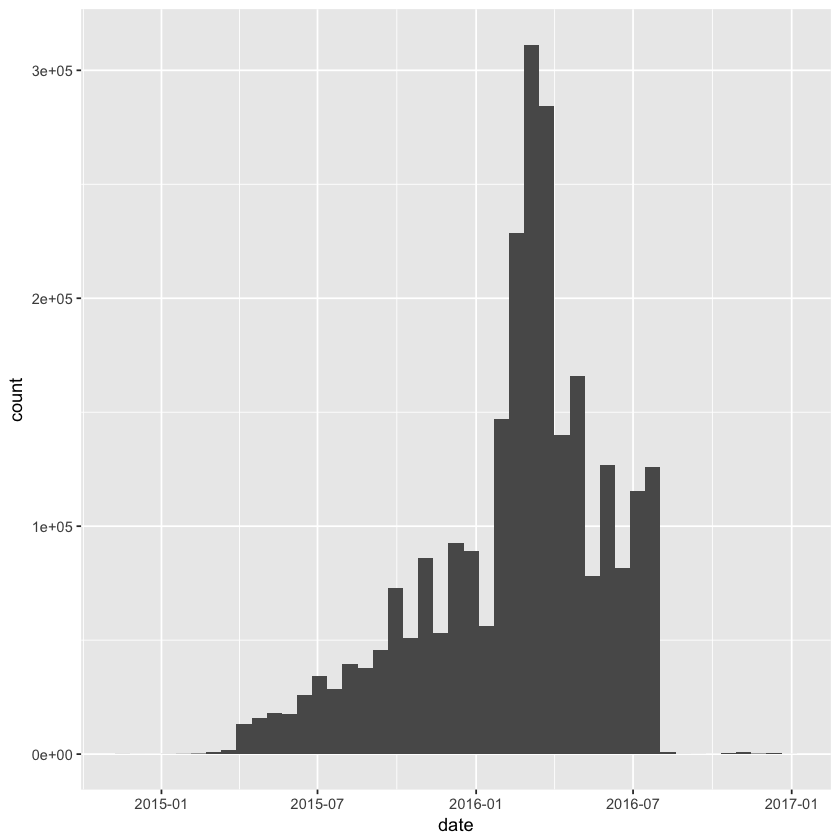

In [36]:
ggplot(df, aes(date)) + geom_histogram(bins = 45)

### Filter donations after the election

In [37]:
summary(df)

     name              party              state            occupation       
 Length:2588641     Length:2588641     Length:2588641     Length:2588641    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
     amount            date           
 Min.   :-10800   Min.   :2014-11-19  
 1st Qu.:    15   1st Qu.:2015-12-20  
 Median :    35   Median :2016-03-05  
 Mean   :   159   Mean   :2016-02-14  
 3rd Qu.:   100   3rd Qu.:2016-04-26  
 Max.   : 86936   Max.   :2016-12-31  

In [38]:
df %>%
  filter(date < as.Date(mdy('11152016'))) %>%
  filter(amount > 0)-> df
dim(df)
head(df)

summary(df)

[1] 2570625       6

name,party,state,occupation,amount,date
HILLARY RODHAM CLINTON,DEM,VA,RETIRED,2700,2015-04-28
HILLARY RODHAM CLINTON,DEM,AR,ATTORNEY,201,2015-05-07
HILLARY RODHAM CLINTON,DEM,DC,PRESIDENT,250,2015-04-12
HILLARY RODHAM CLINTON,DEM,CA,AGENT / HEAD OF MUSIC,2700,2015-05-01
HILLARY RODHAM CLINTON,DEM,TX,REAL ESTATE,2700,2015-05-07
HILLARY RODHAM CLINTON,DEM,GA,CFO,2700,2015-04-28


     name              party              state            occupation       
 Length:2570625     Length:2570625     Length:2570625     Length:2570625    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
     amount             date           
 Min.   :    1.0   Min.   :2014-11-19  
 1st Qu.:   16.0   1st Qu.:2015-12-20  
 Median :   35.0   Median :2016-03-05  
 Mean   :  166.5   Mean   :2016-02-15  
 3rd Qu.:  100.0   3rd Qu.:2016-04-26  
 Max.   :86936.0   Max.   :2016-11-14  

### Plot without log function
We can see that a lot of amounts are around 0 and the distribution is heavily skewed to the right.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


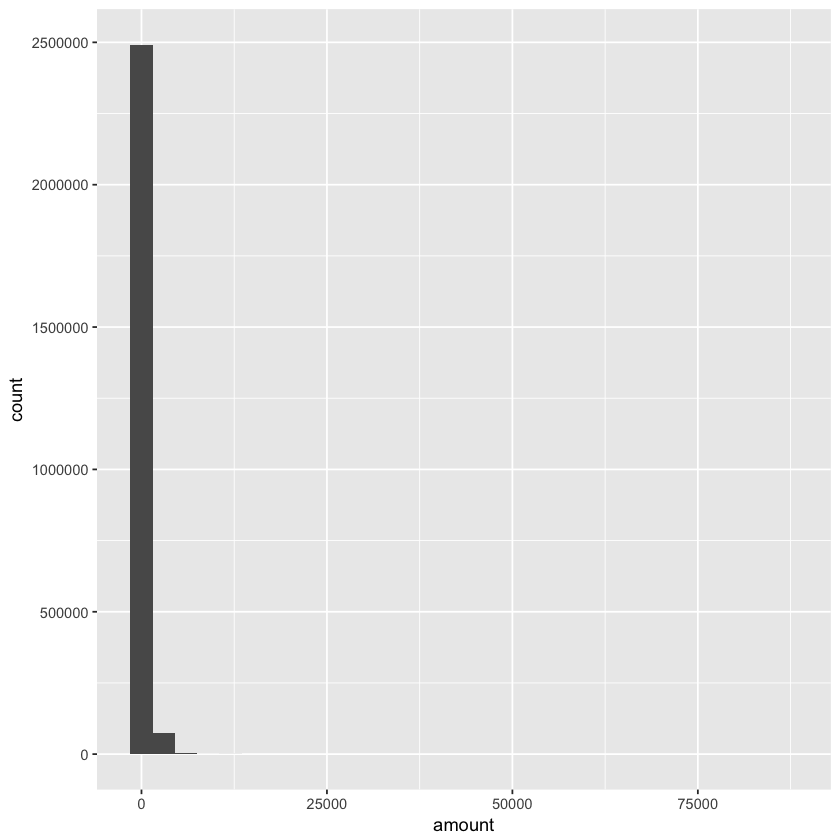

In [39]:
ggplot(df, aes(amount)) + geom_histogram() 

### Histogram plot with log function
Below distribution has values/amounts that are big, which are far from the median, that makes distribution extremely right skewed. Therefore, we have to log scale to get a decent distribution, from right skewed to more normal. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


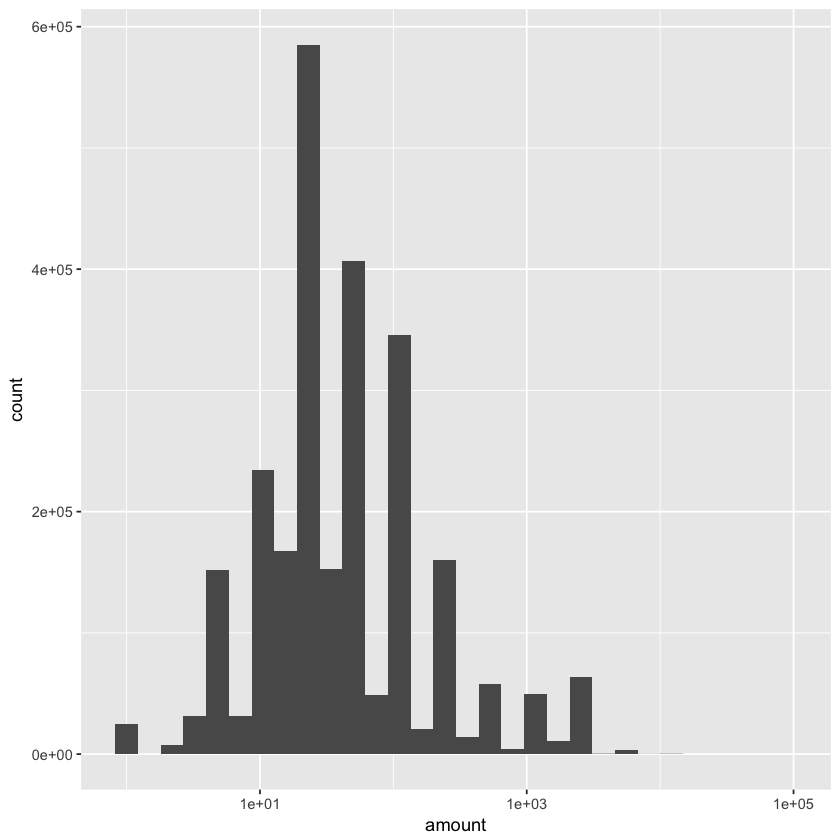

In [40]:
ggplot(df, aes(amount)) + geom_histogram() +scale_x_log10()

## 6. Contributions to Each Candidate Weekly
Below, the table shows the data grouped by name and date and summarized on the total amount of the donation each candidate received per day of the donation.

In [41]:
df %>%
  group_by(name, date) %>%
  summarise(total = sum(amount)) -> df2

dim(df2)
head(df2)
summary(df2)

[1] 6808    3

name,date,total
AUSTIN WADE PETERSEN,2015-11-25,500
AUSTIN WADE PETERSEN,2015-12-05,500
AUSTIN WADE PETERSEN,2015-12-08,500
AUSTIN WADE PETERSEN,2015-12-31,200
AUSTIN WADE PETERSEN,2016-01-25,200
AUSTIN WADE PETERSEN,2016-01-28,100


     name                date                total        
 Length:6808        Min.   :2014-11-19   Min.   :      1  
 Class :character   1st Qu.:2015-07-29   1st Qu.:   1750  
 Mode  :character   Median :2015-10-25   Median :   9548  
                    Mean   :2015-11-03   Mean   :  62859  
                    3rd Qu.:2016-02-01   3rd Qu.:  47076  
                    Max.   :2016-11-14   Max.   :4006045  

### Create all dates
I created a data frame for all days starting from the lowest day to the highest day. This dataframe will help me find weekly contributions later.

In [42]:
allDates <- 
  data.frame(date = as.Date(min(df2$date) : max(df2$date), origin = origin))

head(allDates)

date
2014-11-19
2014-11-20
2014-11-21
2014-11-22
2014-11-23
2014-11-24


### Add all dates to the dataframe
I joined df2 and allDates dataframe to assign a day for each candidate between lowest to highest.

In [43]:
df2 %>%
  split(.$name) %>%
  map(~ full_join(., cbind(allDates, name = .$name[1]),
                  by = c("name", "date"))) %>%
  bind_rows %>%
  arrange(name,date)-> df2

 dim(df2)
 head(df2)

[1] 26172     3

name,date,total
AUSTIN WADE PETERSEN,2014-11-19,NA
AUSTIN WADE PETERSEN,2014-11-20,NA
AUSTIN WADE PETERSEN,2014-11-21,NA
AUSTIN WADE PETERSEN,2014-11-22,NA
AUSTIN WADE PETERSEN,2014-11-23,NA
AUSTIN WADE PETERSEN,2014-11-24,NA


### Replace NAs with 0s
The previous step creates NA values in total column that did not have an amount donated that day. Below function replaces all NAs with 0s.

In [44]:
 df2$total <- ifelse(is.na(df2$total), 0, df2$total)

 dim(df2)
 head(df2)

[1] 26172     3

name,date,total
AUSTIN WADE PETERSEN,2014-11-19,0
AUSTIN WADE PETERSEN,2014-11-20,0
AUSTIN WADE PETERSEN,2014-11-21,0
AUSTIN WADE PETERSEN,2014-11-22,0
AUSTIN WADE PETERSEN,2014-11-23,0
AUSTIN WADE PETERSEN,2014-11-24,0


### Add party to the dataframe
My computer could not process (and R would crash) a joint with already previously created dataframe 'cand', so I had to create a separate one that just has name and party.

In [45]:
df %>% 
  distinct(name, .keep_all = TRUE) %>%
  select(name, party) -> nameparty

head(nameparty)

name,party
HILLARY RODHAM CLINTON,DEM
GARY JOHNSON,LIB
RICHARD J. SANTORUM,REP
JAMES R (RICK) PERRY,REP
JILL STEIN,GRE
RAND PAUL,REP


### Link party to the dataframe
I need to have a party associated with each name, so I could separate Democratic and Republican weekly donations.

In [46]:
df2 %>%
  left_join(., nameparty, by = "name") -> df2

head(df2)

name,date,total,party
AUSTIN WADE PETERSEN,2014-11-19,0,LIB
AUSTIN WADE PETERSEN,2014-11-20,0,LIB
AUSTIN WADE PETERSEN,2014-11-21,0,LIB
AUSTIN WADE PETERSEN,2014-11-22,0,LIB
AUSTIN WADE PETERSEN,2014-11-23,0,LIB
AUSTIN WADE PETERSEN,2014-11-24,0,LIB


### Add a week
I added a week column, so each day would associate with a particular week. Later, I will sum the total column by each week.  

In [47]:
df2 %>% 
  mutate(week = format(date, format="%Y-%U"))-> df2

head(df2)

name,date,total,party,week
AUSTIN WADE PETERSEN,2014-11-19,0,LIB,2014-46
AUSTIN WADE PETERSEN,2014-11-20,0,LIB,2014-46
AUSTIN WADE PETERSEN,2014-11-21,0,LIB,2014-46
AUSTIN WADE PETERSEN,2014-11-22,0,LIB,2014-46
AUSTIN WADE PETERSEN,2014-11-23,0,LIB,2014-47
AUSTIN WADE PETERSEN,2014-11-24,0,LIB,2014-47


### Sum by week
Below, I arranged week in increasing order, grouped by name, week, and party, and summed donations in weektotal column.

In [48]:
df2 %>% 
  arrange(week) %>%
  group_by(name, week, party) %>%
  summarise(weektotal= sum(total)) -> df3

head(df3,20)
summary(df3)

name,week,party,weektotal
AUSTIN WADE PETERSEN,2014-46,LIB,0
AUSTIN WADE PETERSEN,2014-47,LIB,0
AUSTIN WADE PETERSEN,2014-48,LIB,0
AUSTIN WADE PETERSEN,2014-49,LIB,0
AUSTIN WADE PETERSEN,2014-50,LIB,0
AUSTIN WADE PETERSEN,2014-51,LIB,0
AUSTIN WADE PETERSEN,2014-52,LIB,0
AUSTIN WADE PETERSEN,2015-00,LIB,0
AUSTIN WADE PETERSEN,2015-01,LIB,0
AUSTIN WADE PETERSEN,2015-02,LIB,0


     name               week              party             weektotal      
 Length:3852        Length:3852        Length:3852        Min.   :      0  
 Class :character   Class :character   Class :character   1st Qu.:      0  
 Mode  :character   Mode  :character   Mode  :character   Median :      0  
                                                          Mean   : 111097  
                                                          3rd Qu.:   6010  
                                                          Max.   :5088542  

### Weekly Donations for Republican Party
Below, I filtered to have only Republican Party, grouped by name, and added another column to have cumulative total.

In [49]:
df3 %>%
  group_by(name) %>%
  filter(party=="REP") %>%
  mutate(cumulative = cumsum(weektotal))-> weekly_r

dim(weekly_r)
head(weekly_r)

[1] 1926    5

name,week,party,weektotal,cumulative
BENJAMIN S SR MD CARSON,2014-46,REP,0,0
BENJAMIN S SR MD CARSON,2014-47,REP,0,0
BENJAMIN S SR MD CARSON,2014-48,REP,0,0
BENJAMIN S SR MD CARSON,2014-49,REP,0,0
BENJAMIN S SR MD CARSON,2014-50,REP,0,0
BENJAMIN S SR MD CARSON,2014-51,REP,0,0


### Weekly Donation for Democratic Party
Below, I filtered to have only Democratic Party, grouped by name, and added another column to have cumulative total.

In [50]:
df3 %>%
  group_by(name) %>%
  filter(party=="DEM") %>%
  mutate(cumulative = cumsum(weektotal))-> weekly_d

dim(weekly_d)
head(weekly_d)

[1] 749   5

name,week,party,weektotal,cumulative
BERNARD SANDERS,2014-46,DEM,0,0
BERNARD SANDERS,2014-47,DEM,0,0
BERNARD SANDERS,2014-48,DEM,0,0
BERNARD SANDERS,2014-49,DEM,0,0
BERNARD SANDERS,2014-50,DEM,0,0
BERNARD SANDERS,2014-51,DEM,0,0


### Identify Top 5 Republican candidates
Below are the top five Republican candidates who received the most donations in terms of dollars.

In [51]:
weekly_r %>%
  group_by(name) %>%
  summarise(total = sum(weektotal)) %>%
  arrange(desc(total)) %>%
  top_n(5, total) -> top_weekly_r

head(top_weekly_r)

name,total
"RAFAEL EDWARD ""TED"" CRUZ",55418404
MARCO RUBIO,36618732
JEB BUSH,32841536
BENJAMIN S SR MD CARSON,26813278
DONALD J. TRUMP,15923950


### Identify Top 5 Democratic Candidates
Below are the top five Democratic candidates who received the most donations in terms of dollars.

In [52]:
weekly_d %>%
  group_by(name) %>%
  summarise(total = sum(weektotal)) %>%
  arrange(desc(total)) %>%
  top_n(5, total) -> top_weekly_d

head(top_weekly_d)

name,total
HILLARY RODHAM CLINTON,166282787
BERNARD SANDERS,38769561
MARTIN JOSEPH O'MALLEY,3559400
LAWRENCE LESSIG,591565
WILLIE WILSON,24888


### Aggregate non top 5 Republican candidates into 'other'

In [53]:
weekly_r$name <- ifelse(weekly_r$name %in% top_weekly_r$name, weekly_r$name, 'OTHER')

head(weekly_r)
table(weekly_r$name)

name,week,party,weektotal,cumulative
BENJAMIN S SR MD CARSON,2014-46,REP,0,0
BENJAMIN S SR MD CARSON,2014-47,REP,0,0
BENJAMIN S SR MD CARSON,2014-48,REP,0,0
BENJAMIN S SR MD CARSON,2014-49,REP,0,0
BENJAMIN S SR MD CARSON,2014-50,REP,0,0
BENJAMIN S SR MD CARSON,2014-51,REP,0,0



 BENJAMIN S SR MD CARSON         DONALD J.  TRUMP                 JEB BUSH 
                     107                      107                      107 
             MARCO RUBIO                    OTHER RAFAEL EDWARD "TED" CRUZ 
                     107                     1391                      107 

### Aggregate non top 5 Democratic candidates into 'other'

In [54]:
weekly_d$name <- ifelse(weekly_d$name %in% top_weekly_d$name, weekly_d$name, 'OTHER')

head(weekly_d)
table(weekly_d$name)

name,week,party,weektotal,cumulative
BERNARD SANDERS,2014-46,DEM,0,0
BERNARD SANDERS,2014-47,DEM,0,0
BERNARD SANDERS,2014-48,DEM,0,0
BERNARD SANDERS,2014-49,DEM,0,0
BERNARD SANDERS,2014-50,DEM,0,0
BERNARD SANDERS,2014-51,DEM,0,0



        BERNARD SANDERS HILLARY RODHAM  CLINTON         LAWRENCE LESSIG 
                    107                     107                     107 
 MARTIN JOSEPH O'MALLEY                   OTHER           WILLIE WILSON 
                    107                     214                     107 

### Plot of weekly donation for Republican Party

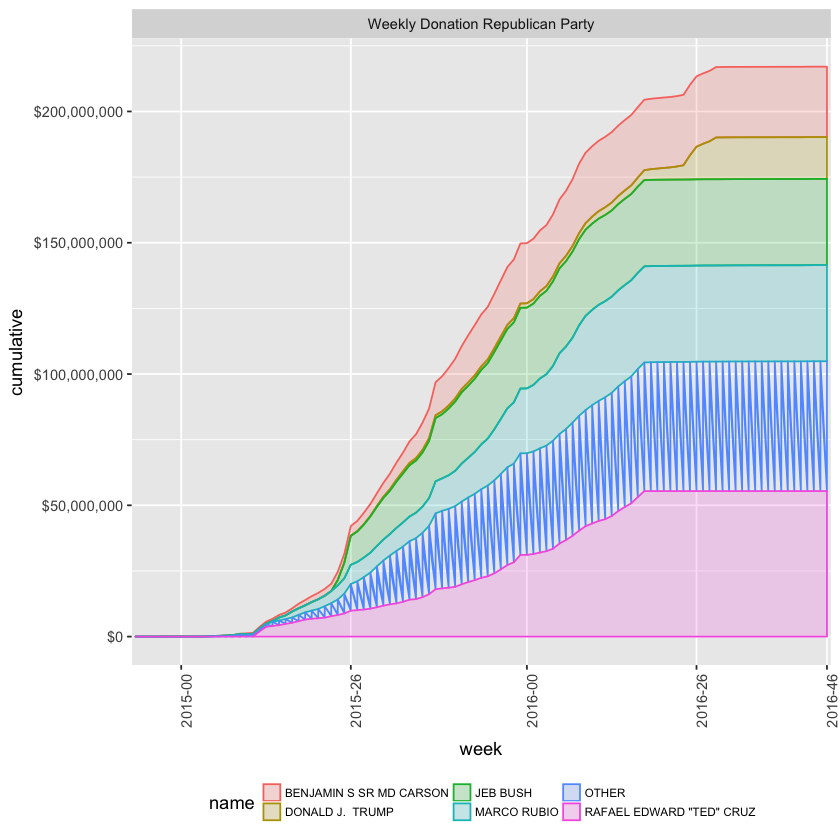

In [55]:
weekly_r$title <- "Weekly Donation Republican Party"
p1 <- ggplot(weekly_r, aes(x=week, y=cumulative, colour = name, group = name, fill = name), size =1)+
  geom_area(alpha=.2) +
  scale_y_continuous(label = dollar)+
  theme(legend.position="bottom", axis.text.x=element_text(size=rel(1), angle=90),
        legend.key.size = unit(.8,"line"), legend.text = element_text(size=7))+
  facet_grid(. ~ title)+
  scale_x_discrete(breaks=c("2015-00","2015-26","2016-00","2016-26","2016-46"))

p1

### Plot of weekly donation for Democratic Party
I split between two graphs, because it was difficult to see them all being in one. Even with this split it is difficult to see Willie Wilson and OTHER donations. I chose to keep it to two graphs rather than three because the real estate is tight and I would have to make small fonts to fit them all, which would become difficult to read.

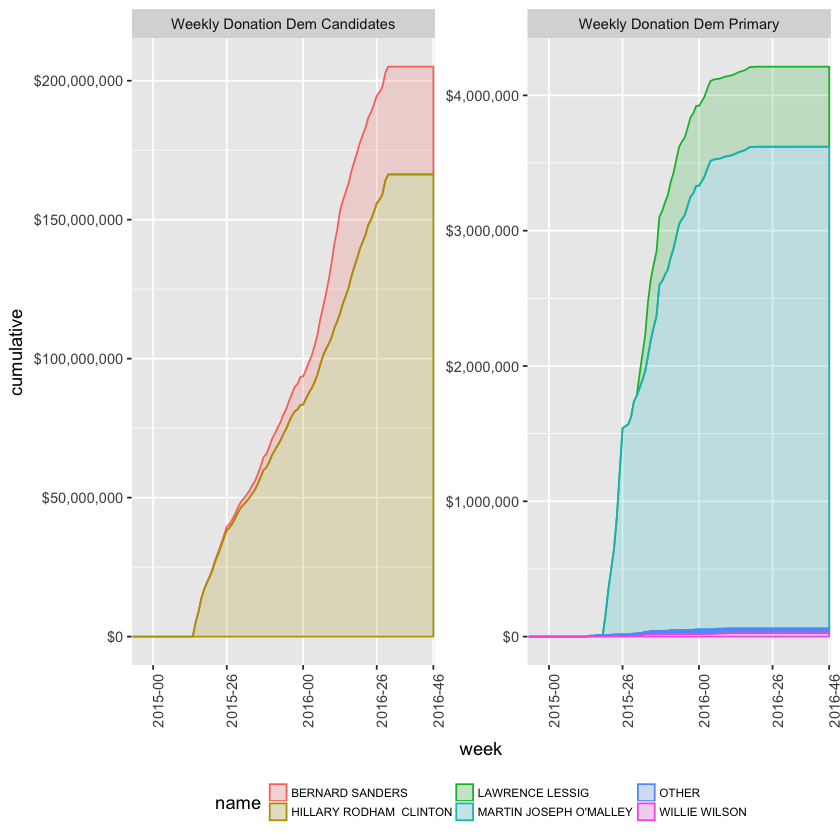

In [56]:
weekly_d$big <- ifelse(weekly_d$name %in% c('BERNARD SANDERS' , 'HILLARY RODHAM  CLINTON'), "Weekly Donation Dem Candidates", "Weekly Donation Dem Primary")
p2 <- ggplot(weekly_d, aes(x=week, y=cumulative, colour = name, group = name, fill = name), size =1)+
  geom_area(alpha=.2) +
  facet_wrap(~big, scales = "free")+
  scale_y_continuous(label = dollar)+
  theme(legend.position="bottom", axis.text.x=element_text(size=rel(1), angle=90),
        legend.key.size = unit(.8,"line"), legend.text = element_text(size=7))+
  scale_x_discrete(breaks=c("2015-00","2015-26","2016-00","2016-26","2016-46"))

p2

## 7. Money Raised and Votes Received 
Below, I grouped data by party, state, and name. I filtered to have only democratic and republican parties, counted how many donations were made, and how much money was raised pre candidate per sate.

In [57]:
df %>%
  group_by(party, state, name) %>%
  filter(party=="DEM" | party=="REP") %>%
  summarise(num_of_don = n(), raised = sum(amount)) -> by_state

head(by_state)

party,state,name,num_of_don,raised
DEM,AA,BERNARD SANDERS,90,4166
DEM,AA,HILLARY RODHAM CLINTON,53,10517
DEM,AE,BERNARD SANDERS,428,19579
DEM,AE,HILLARY RODHAM CLINTON,207,25862
DEM,AE,MARTIN JOSEPH O'MALLEY,1,2700
DEM,AK,BERNARD SANDERS,3892,169028


### Import data from primary results
Below, I imported data for primary results from the csv file to the dataframe.

In [58]:
votes <- read.csv('primary_results.csv', header = T)

head(votes)

state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
Alabama,AL,Autauga,1001,Democrat,Bernie Sanders,544,0.182
Alabama,AL,Autauga,1001,Democrat,Hillary Clinton,2387,0.800
Alabama,AL,Baldwin,1003,Democrat,Bernie Sanders,2694,0.329
Alabama,AL,Baldwin,1003,Democrat,Hillary Clinton,5290,0.647
Alabama,AL,Barbour,1005,Democrat,Bernie Sanders,222,0.078
Alabama,AL,Barbour,1005,Democrat,Hillary Clinton,2567,0.906


### Number of votes by state by candidate 
Below, I grouped data by state and candidate to get the total number of votes. 

In [59]:
votes %>%
  group_by(state_abbreviation, candidate) %>%
  summarise(votes_received = sum(votes)) -> state_votes

head(state_votes)

state_abbreviation,candidate,votes_received
AK,Ben Carson,2401
AK,Bernie Sanders,440
AK,Donald Trump,7346
AK,Hillary Clinton,99
AK,John Kasich,892
AK,Marco Rubio,3318


### Rename state_votes data frame
Below, I renamed columns to match the names of columns in other dataframes previously created.

In [60]:
state_votes %>%
  rename( state = state_abbreviation,
          name = candidate) -> state_votes
head(state_votes)

state,name,votes_received
AK,Ben Carson,2401
AK,Bernie Sanders,440
AK,Donald Trump,7346
AK,Hillary Clinton,99
AK,John Kasich,892
AK,Marco Rubio,3318


### Clean names
In order to create a joint between the by_state and the state_votes dataframes from previous step, I need to clean names in my by_state dataframe to match in state_votes.

In [61]:
by_state %>%
  mutate(name=replace(name, name == 'BENJAMIN S SR MD CARSON', 'Ben Carson')) %>%
  mutate(name=replace(name, name == 'BERNARD SANDERS', 'Bernie Sanders')) %>%
  mutate(name=replace(name, name == 'CARLY FIORINA', 'Carly Fiorina')) %>%
  mutate(name=replace(name, name == 'CHRISTOPHER J CHRISTIE', 'Chris Christie')) %>%
  mutate(name=replace(name, name == 'DONALD J.  TRUMP', 'Donald Trump')) %>%
  mutate(name=replace(name, name == 'HILLARY RODHAM  CLINTON', 'Hillary Clinton')) %>%
  mutate(name=replace(name, name == 'JEB BUSH', 'Jeb Bush')) %>%
  mutate(name=replace(name, name == 'JOHN R KASICH', 'John Kasich')) %>%
  mutate(name=replace(name, name == 'MARCO RUBIO', 'Marco Rubio')) %>%
  mutate(name=replace(name, name == "MARTIN JOSEPH O'MALLEY", "Martin O'Malley")) %>%
  mutate(name=replace(name, name == 'MIKE HUCKABEE', 'Mike Huckabee')) %>%
  mutate(name=replace(name, name == 'RAND PAUL', 'Rand Paul')) %>%
  mutate(name=replace(name, name == 'RICHARD J. SANTORUM', 'Rick Santorum')) %>%
  mutate(name=replace(name, name == 'RAFAEL EDWARD "TED" CRUZ', 'Ted Cruz')) ->by_state

table(by_state$name)


                  Ben Carson               Bernie Sanders 
                          68                           65 
                BOBBY JINDAL                Carly Fiorina 
                          38                           57 
              Chris Christie                 Donald Trump 
                          52                           60 
             GEORGE E PATAKI              Hillary Clinton 
                          27                           60 
        JAMES R (RICK) PERRY          JAMES S III GILMORE 
                          37                           17 
                    Jeb Bush                  John Kasich 
                          58                           55 
             LAWRENCE LESSIG LINCOLN DAVENPORT MR. CHAFEE 
                          50                           15 
            LINDSEY O GRAHAM                  Marco Rubio 
                          50                           61 
                MARK EVERSON              Martin O'Mall

In [62]:
head(state_votes)
head(by_state)

state,name,votes_received
AK,Ben Carson,2401
AK,Bernie Sanders,440
AK,Donald Trump,7346
AK,Hillary Clinton,99
AK,John Kasich,892
AK,Marco Rubio,3318


party,state,name,num_of_don,raised
DEM,AA,Bernie Sanders,90,4166
DEM,AA,Hillary Clinton,53,10517
DEM,AE,Bernie Sanders,428,19579
DEM,AE,Hillary Clinton,207,25862
DEM,AE,Martin O'Malley,1,2700
DEM,AK,Bernie Sanders,3892,169028


### Join with votes received
Now, I can join two data frames on state and name. I used inner join because it makes sense to only join on values that both data frames have, because I am doing analysis on money raised and votes received. It would make no difference if I made a right or left joint, because I would have a lot of NAs and since I would replace them with zeros, it would have no effect on my analysis.

In [63]:
by_state %>%
  inner_join(state_votes, by = c("state", "name")) -> outcome_by_state

head(outcome_by_state)

party,state,name,num_of_don,raised,votes_received
DEM,AK,Bernie Sanders,3892,169028,440
DEM,AK,Hillary Clinton,1242,107123,99
DEM,AL,Bernie Sanders,3497,134518,76399
DEM,AL,Hillary Clinton,3994,605978,309928
DEM,AR,Bernie Sanders,3692,118584,64868
DEM,AR,Hillary Clinton,4582,1061467,144580


### Add ratios 
I added a ratio column to see in terms of percentages which candidate dominated the state in terms of votes received.

In [64]:
outcome_by_state %>%
  group_by(state, party) %>%
  mutate( ratio_raised = round(raised/sum(raised),2)) -> outcome_by_state

head(outcome_by_state)

party,state,name,num_of_don,raised,votes_received,ratio_raised
DEM,AK,Bernie Sanders,3892,169028,440,0.61
DEM,AK,Hillary Clinton,1242,107123,99,0.39
DEM,AL,Bernie Sanders,3497,134518,76399,0.18
DEM,AL,Hillary Clinton,3994,605978,309928,0.82
DEM,AR,Bernie Sanders,3692,118584,64868,0.10
DEM,AR,Hillary Clinton,4582,1061467,144580,0.90


## 8. Decision Trees and Random Forest

### Import state facts data into R

In [65]:
county_facts <- read.csv('county_facts.csv', header = T)
head(county_facts)

fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,⋯,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,United States,,318857056,308758105,3.3,308745538,6.2,23.1,14.5,⋯,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1000,Alabama,,4849377,4780127,1.4,4779736,6.1,22.8,15.3,⋯,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,⋯,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,⋯,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,⋯,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0
1007,Bibb County,AL,22506,22919,-1.8,22915,5.3,21.0,14.8,⋯,0.0,0.0,0,0,124707,5804,10757,19,622.58,36.8


### Join votes and county facts dataframes
I joined votes dataframe, which I imported from part 7, with county fact with on the fips column. I did inner joint so that it only joins on the data in both dataframes. 

In [66]:
votes%>%
  inner_join(county_facts, by = c("fips")) -> facts_and_votes
head(votes)
head(facts_and_votes)

state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
Alabama,AL,Autauga,1001,Democrat,Bernie Sanders,544,0.182
Alabama,AL,Autauga,1001,Democrat,Hillary Clinton,2387,0.800
Alabama,AL,Baldwin,1003,Democrat,Bernie Sanders,2694,0.329
Alabama,AL,Baldwin,1003,Democrat,Hillary Clinton,5290,0.647
Alabama,AL,Barbour,1005,Democrat,Bernie Sanders,222,0.078
Alabama,AL,Barbour,1005,Democrat,Hillary Clinton,2567,0.906


state,state_abbreviation.x,county,fips,party,candidate,votes,fraction_votes,area_name,state_abbreviation.y,⋯,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
Alabama,AL,Autauga,1001,Democrat,Bernie Sanders,544,0.182,Autauga County,AL,⋯,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
Alabama,AL,Autauga,1001,Democrat,Hillary Clinton,2387,0.800,Autauga County,AL,⋯,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
Alabama,AL,Baldwin,1003,Democrat,Bernie Sanders,2694,0.329,Baldwin County,AL,⋯,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
Alabama,AL,Baldwin,1003,Democrat,Hillary Clinton,5290,0.647,Baldwin County,AL,⋯,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
Alabama,AL,Barbour,1005,Democrat,Bernie Sanders,222,0.078,Barbour County,AL,⋯,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0
Alabama,AL,Barbour,1005,Democrat,Hillary Clinton,2567,0.906,Barbour County,AL,⋯,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


### Remove state_abbreviation.x, state, and fips columns

In [67]:
facts_and_votes %>%
  select(-state, -state_abbreviation.x, -fips, -county, -fraction_votes, -area_name)-> facts_and_votes
head(facts_and_votes)

party,candidate,votes,state_abbreviation.y,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,⋯,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
Democrat,Bernie Sanders,544,AL,55395,54571,1.5,54571,6.0,25.2,⋯,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
Democrat,Hillary Clinton,2387,AL,55395,54571,1.5,54571,6.0,25.2,⋯,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
Democrat,Bernie Sanders,2694,AL,200111,182265,9.8,182265,5.6,22.2,⋯,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
Democrat,Hillary Clinton,5290,AL,200111,182265,9.8,182265,5.6,22.2,⋯,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
Democrat,Bernie Sanders,222,AL,26887,27457,-2.1,27457,5.7,21.2,⋯,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0
Democrat,Hillary Clinton,2567,AL,26887,27457,-2.1,27457,5.7,21.2,⋯,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


### Rename columns
I renamed candidate and state_abbreviation.y columns to match with the other previously created dataframes.

In [68]:
facts_and_votes %>%
  rename( name   = candidate,
          state = state_abbreviation.y) ->facts_and_votes
head(facts_and_votes)

party,name,votes,state,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,⋯,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
Democrat,Bernie Sanders,544,AL,55395,54571,1.5,54571,6.0,25.2,⋯,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
Democrat,Hillary Clinton,2387,AL,55395,54571,1.5,54571,6.0,25.2,⋯,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
Democrat,Bernie Sanders,2694,AL,200111,182265,9.8,182265,5.6,22.2,⋯,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
Democrat,Hillary Clinton,5290,AL,200111,182265,9.8,182265,5.6,22.2,⋯,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
Democrat,Bernie Sanders,222,AL,26887,27457,-2.1,27457,5.7,21.2,⋯,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0
Democrat,Hillary Clinton,2567,AL,26887,27457,-2.1,27457,5.7,21.2,⋯,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


### Clean party names and select five state facts columns
I cleaned party names going from 'Democrat' to 'DEM' and 'Republican' to 'REP' to make sure these match with other dataframes I previously created.

Below are five sate facts I selected that I think might influence the money raised and primary outcomes.

AGE775214, EDU685213, HSG096213, INC110213, POP060210   

AGE775214 Persons 65 years and over, percent, 2014 - count   
EDU685213	Bachelor's degree or higher, percent of persons age 25+, 2009-2013 - %   
HSG096213	Housing units in multi-unit structures, percent, 2009-2013 - %   
INC110213	Median household income, 2009-2013 - $   
POP060210	Population per square mile, 2010 - count   

In [69]:
facts_and_votes %>%
  mutate(party=replace(party, party == 'Democrat', 'DEM')) %>%
  mutate(party=replace(party, party == 'Republican', 'REP')) %>%
  select(party, state, name, votes, AGE775214, EDU685213, HSG096213, INC110213, POP060210) ->facts_and_votes

head(facts_and_votes)

party,state,name,votes,AGE775214,EDU685213,HSG096213,INC110213,POP060210
DEM,AL,Bernie Sanders,544,13.8,20.9,8.3,53682,91.8
DEM,AL,Hillary Clinton,2387,13.8,20.9,8.3,53682,91.8
DEM,AL,Bernie Sanders,2694,18.7,27.7,24.4,50221,114.6
DEM,AL,Hillary Clinton,5290,18.7,27.7,24.4,50221,114.6
DEM,AL,Bernie Sanders,222,16.5,13.4,10.6,32911,31.0
DEM,AL,Hillary Clinton,2567,16.5,13.4,10.6,32911,31.0


### Group and summarize data
I grouped data by party, state, and name and summarized numeric columns. 

In [70]:
facts_and_votes %>%
  group_by(party, state, name) %>%
  summarize(votes_sum = sum(votes), age= mean(AGE775214), edu = mean(EDU685213), hs = mean(EDU685213) , inc= mean(INC110213), pop= mean(POP060210)) -> facts_and_votes_summarized
head(facts_and_votes_summarized)
summary(facts_and_votes_summarized)

head(facts_and_votes_summarized)
head(outcome_by_state)

party,state,name,votes_sum,age,edu,hs,inc,pop
DEM,AL,Bernie Sanders,76399,16.93582,15.99851,15.99851,37778.72,90.20746
DEM,AL,Hillary Clinton,309928,16.93582,15.99851,15.99851,37778.72,90.20746
DEM,AR,Bernie Sanders,64868,18.33600,14.34400,14.34400,35861.81,54.35200
DEM,AR,Hillary Clinton,144580,18.33600,14.34400,14.34400,35861.81,54.35200
DEM,AZ,Bernie Sanders,163400,18.97333,18.36667,18.36667,42891.27,52.04667
DEM,AZ,Hillary Clinton,235697,18.97333,18.36667,18.36667,42891.27,52.04667


    party              state               name             votes_sum      
 Length:234         Length:234         Length:234         Min.   :     43  
 Class :character   Class :character   Class :character   1st Qu.:  35950  
 Mode  :character   Mode  :character   Mode  :character   Median : 118671  
                                                          Mean   : 221959  
                                                          3rd Qu.: 319554  
                                                          Max.   :1940580  
      age             edu              hs             inc       
 Min.   :13.74   Min.   :14.34   Min.   :14.34   Min.   :34600  
 1st Qu.:16.60   1st Qu.:17.28   1st Qu.:17.28   1st Qu.:41126  
 Median :17.83   Median :19.64   Median :19.64   Median :45650  
 Mean   :17.60   Mean   :20.08   Mean   :20.08   Mean   :46656  
 3rd Qu.:18.72   3rd Qu.:22.10   3rd Qu.:22.10   3rd Qu.:49446  
 Max.   :20.36   Max.   :33.70   Max.   :33.70   Max.   :72387  
      pop    

party,state,name,votes_sum,age,edu,hs,inc,pop
DEM,AL,Bernie Sanders,76399,16.93582,15.99851,15.99851,37778.72,90.20746
DEM,AL,Hillary Clinton,309928,16.93582,15.99851,15.99851,37778.72,90.20746
DEM,AR,Bernie Sanders,64868,18.33600,14.34400,14.34400,35861.81,54.35200
DEM,AR,Hillary Clinton,144580,18.33600,14.34400,14.34400,35861.81,54.35200
DEM,AZ,Bernie Sanders,163400,18.97333,18.36667,18.36667,42891.27,52.04667
DEM,AZ,Hillary Clinton,235697,18.97333,18.36667,18.36667,42891.27,52.04667


party,state,name,num_of_don,raised,votes_received,ratio_raised
DEM,AK,Bernie Sanders,3892,169028,440,0.61
DEM,AK,Hillary Clinton,1242,107123,99,0.39
DEM,AL,Bernie Sanders,3497,134518,76399,0.18
DEM,AL,Hillary Clinton,3994,605978,309928,0.82
DEM,AR,Bernie Sanders,3692,118584,64868,0.10
DEM,AR,Hillary Clinton,4582,1061467,144580,0.90


### Join with outcome_by_state to get money raised
I joined facts_and_votes_summarized with outcome_by_state, which I got from part 7. I dropped unneeded columns: num_of_don (i.e. number of donation) and votes_received.

In [71]:
facts_and_votes_summarized %>%
  inner_join(outcome_by_state, by = c('state', 'name', 'party')) %>%
  select(-num_of_don, -votes_received, -ratio_raised) -> facts_votes_money_raised

head(outcome_by_state)
head(facts_votes_money_raised)

party,state,name,num_of_don,raised,votes_received,ratio_raised
DEM,AK,Bernie Sanders,3892,169028,440,0.61
DEM,AK,Hillary Clinton,1242,107123,99,0.39
DEM,AL,Bernie Sanders,3497,134518,76399,0.18
DEM,AL,Hillary Clinton,3994,605978,309928,0.82
DEM,AR,Bernie Sanders,3692,118584,64868,0.10
DEM,AR,Hillary Clinton,4582,1061467,144580,0.90


party,state,name,votes_sum,age,edu,hs,inc,pop,raised
DEM,AL,Bernie Sanders,76399,16.93582,15.99851,15.99851,37778.72,90.20746,134518
DEM,AL,Hillary Clinton,309928,16.93582,15.99851,15.99851,37778.72,90.20746,605978
DEM,AR,Bernie Sanders,64868,18.33600,14.34400,14.34400,35861.81,54.35200,118584
DEM,AR,Hillary Clinton,144580,18.33600,14.34400,14.34400,35861.81,54.35200,1061467
DEM,AZ,Bernie Sanders,163400,18.97333,18.36667,18.36667,42891.27,52.04667,700313
DEM,AZ,Hillary Clinton,235697,18.97333,18.36667,18.36667,42891.27,52.04667,1234451


### Decision trees for money raised and votes received

### Decision tree for money raised
Analysis:
Here, it stopped at three splits, there is not variation beyond this point. The facts that influence money raised:    
•	Population per square mile, 2010 and     
•	Bachelor's degree or higher, percent of persons age 25+, 2009-2013    
These best predict money raised. However, these do not explain everything. For example, we can have a situation where the population might be similar between counties, but one might be richer than other. We cannot tell that form this tree diagram. 


Regression tree:
rpart(formula = raised ~ age + edu + hs + inc + pop, data = facts_votes_money_raised)

Variables actually used in tree construction:
[1] edu pop

Root node error: 2.9039e+15/233 = 1.2463e+13

n= 233 

        CP nsplit rel error xerror    xstd
1 0.093003      0   1.00000 1.0067 0.52667
2 0.040213      1   0.90700 1.1151 0.52604
3 0.036749      2   0.86678 1.1519 0.52645
4 0.010000      4   0.79329 1.0863 0.48816


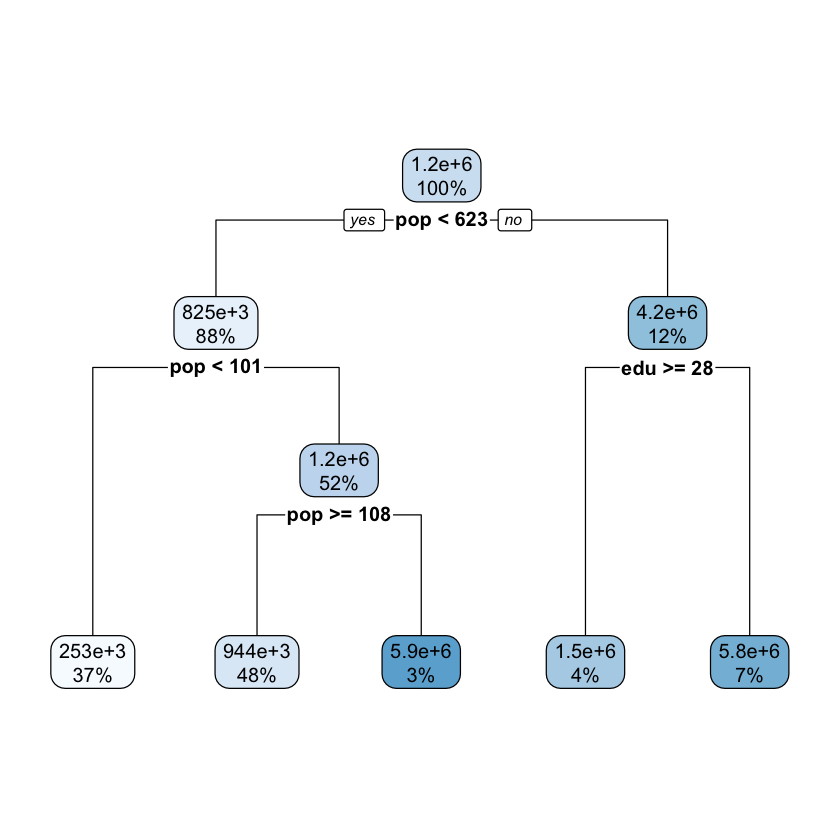

In [72]:
continuous.model <- rpart(raised ~ age+edu+hs+inc+pop, data = facts_votes_money_raised)
rpart.plot(continuous.model)
printcp(continuous.model)

In [73]:
1.2463e+13*0.79329

[1] 9.886773e+12

### Random forest for money raised
Analysis:
Below is the root node error which is being calculated from training population. Since 1.27042812032535 is greater than 1. That means that the random forest model has a higher error compared to the decision tree model. We can deduce that the decision tree model does better compared to the random forest. 

In [75]:
continuous.model1 <- ranger(raised ~ age+edu+hs+inc+pop, data = facts_votes_money_raised)
continuous.model1$r.squared
continuous.model1$prediction.error


continuous.model1$prediction.error/9886773270000

[1] -0.002795025

[1] 1.255199e+13

[1] 1.269574

### Create random forest model using caret package

In [76]:
set.seed(123)
test_idx <- sample(length(facts_votes_money_raised$raised), 11)
test_set <- facts_votes_money_raised[test_idx, ]
train_set <- facts_votes_money_raised[-test_idx, ]

### Forest model

In [77]:
forest_model <- train(train_set[,5:9],
                      train_set$raised,
                      method="ranger",
                      tuneGrid = data.frame(mtry =3, splitrule ="variance", min.node.size =3),
                      trControl = trainControl(method = "none"))
forest_model

Warning message:
“Setting row names on a tibble is deprecated.”

Random Forest 

222 samples
  5 predictor

No pre-processing
Resampling: None 

### Tree model

In [78]:
tree_model <- train(train_set[,5:9],
                    train_set$raised,
                    method = "rpart")

tree_model

Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is depr

CART 

222 samples
  5 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 222, 222, 222, 222, 222, 222, ... 
Resampling results across tuning parameters:

  cp          RMSE     Rsquared    MAE    
  0.01172166  3498389  0.11155816  1247744
  0.05204941  3522386  0.08818344  1272727
  0.11968467  3541130  0.04314850  1279580

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.01172166.

### Compare accuracy of two models

In [79]:
forest_predict <- predict(forest_model, newdata = test_set[,5:9])
tree_predict <- predict(tree_model, newdata = test_set[,5:9])

### Predict on new data

In [80]:
errors <- data.frame( rf = forest_predict, dt = tree_predict, actual = test_set$raised)

### Plot errors
Analysis:
There are too few data points to see the pattern, but we can see a few points being far from zero, meaning those points have high error value, even though the values were log transformed, there are still outliers.

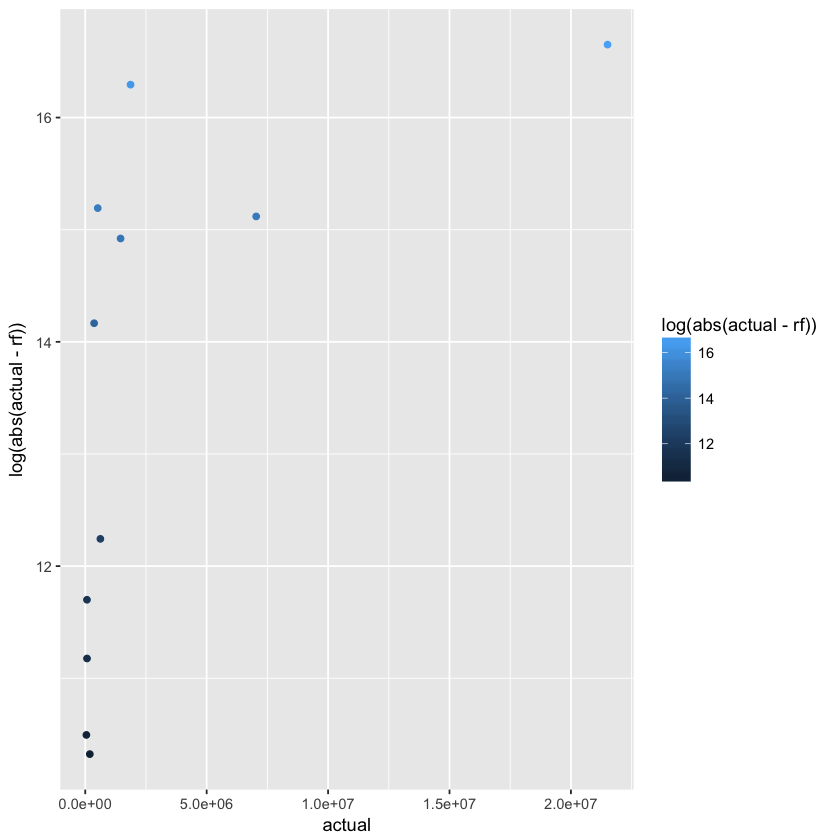

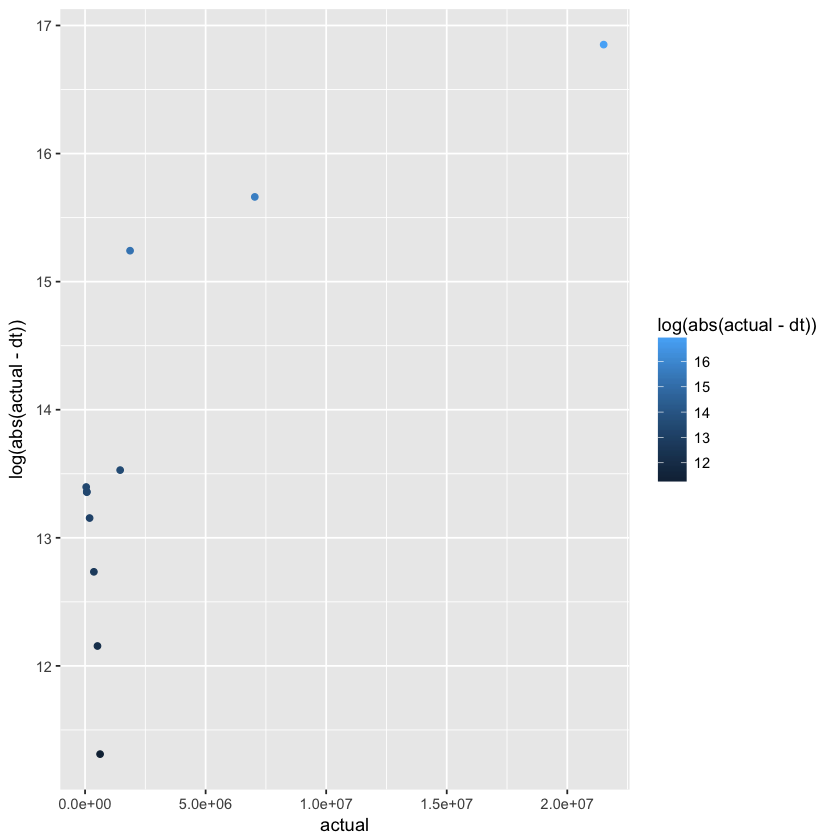

In [81]:
ggplot(errors, aes(x=actual, color = log(abs(actual -rf)))) + geom_point(aes(y=log(abs(actual -rf))))
ggplot(errors, aes(x=actual, color = log(abs(actual -dt)))) + geom_point(aes(y=log(abs(actual -dt))))

### Compare errors
Analysis:
In a perfect world you want errors to be as close to 0 as possible. We can see that that the ratios are  greater than 1, meaning that the bottom number is smaller than the top. m1, r1 and m2, r2 are mean squared error and root squared error for the random forest prediction and decision tree prediction, respectively. Since m1 and r1 are the bottom number, which correspond to random forest prediction, we can say that the error is smaller than the decision tree prediction. Therefore, in this case the decision tree prediction model is the better one. 

In [82]:
m1 <- mse(forest_predict, test_set$raised)
r1 <- rmse(forest_predict, test_set$raised)

m2 <- mse(tree_predict, test_set$raised)
r2 <- rmse(tree_predict, test_set$raised)

m2/m1
r2/r1

[1] 1.042292

[1] 1.020927

### Decision tree for votes received
Analysis:
Here, it stopped at six splits, there is not variation beyond this point. Using the following state facts:     
•	Population per square mile, 2010     
•	Bachelor's degree or higher, percent of persons age 25+, 2009-2013    
•	Persons 65 years and over, percent, 2014    
These best predict the votes won. 


Regression tree:
rpart(formula = votes_sum ~ age + edu + hs + inc + pop, data = facts_votes_money_raised)

Variables actually used in tree construction:
[1] age edu pop

Root node error: 1.8732e+13/233 = 8.0396e+10

n= 233 

        CP nsplit rel error  xerror    xstd
1 0.200887      0   1.00000 1.01049 0.20922
2 0.101554      1   0.79911 0.80937 0.17198
3 0.050973      2   0.69756 0.74460 0.15776
4 0.036702      3   0.64659 0.74165 0.15872
5 0.024746      4   0.60988 0.68243 0.13900
6 0.016060      5   0.58514 0.61741 0.11872
7 0.015654      6   0.56908 0.59172 0.11645
8 0.010000      7   0.55343 0.59407 0.11642


[1] 44493558280

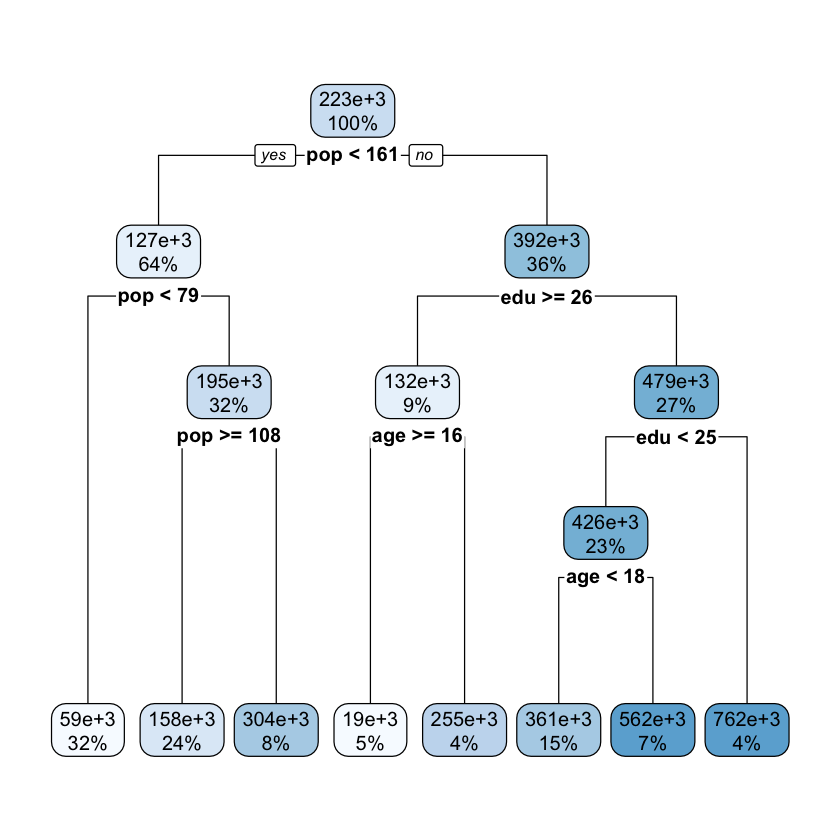

In [83]:
continuous.model2 <- rpart(votes_sum ~ age+edu+hs+inc+pop, data = facts_votes_money_raised)
rpart.plot(continuous.model2)
printcp(continuous.model2)

8.0396e+10*0.55343

### Random forest for votes received
Analysis:
Below is the root node error which is being calculated from training population. Since 0.9933917 is less than 1. That means that the random forest model has a higher error compared to the decision tree model. We can deduce that the decision tree model does better compared to the random forest.

In [84]:
continuous.model2 <- ranger(votes_sum ~ age+edu+hs+inc+pop, data = facts_votes_money_raised)
continuous.model2$r.squared
continuous.model2$prediction.error


continuous.model2$prediction.error/44493558280

[1] 0.3761786

[1] 50368953025

[1] 1.13205

### Create random forest model using caret package

In [85]:
set.seed(123)
test_idx2 <- sample(length(facts_votes_money_raised$votes_sum), 11)
test_set2 <- facts_votes_money_raised[test_idx2, ]
train_set2 <- facts_votes_money_raised[-test_idx2, ]

### Forest model

In [86]:
forest_model2 <- train(train_set2[,5:9],
                      train_set2$votes_sum,
                      method="ranger",
                      tuneGrid = data.frame(mtry =3, splitrule ="variance", min.node.size =3),
                      trControl = trainControl(method = "none"))
forest_model2

Warning message:
“Setting row names on a tibble is deprecated.”

Random Forest 

222 samples
  5 predictor

No pre-processing
Resampling: None 

### Tree model

In [87]:
tree_model2 <- train(train_set2[,5:9],
                    train_set2$votes_sum,
                    method = "rpart")

tree_model2

Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is deprecated.”Warning message:
“Setting row names on a tibble is depr

CART 

222 samples
  5 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 222, 222, 222, 222, 222, 222, ... 
Resampling results across tuning parameters:

  cp          RMSE      Rsquared   MAE     
  0.04297812  253694.3  0.2017953  163725.8
  0.09781093  255316.1  0.1761156  164514.5
  0.21587903  261980.1  0.1687201  178484.1

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was cp = 0.04297812.

### Compare accuracy of two models

In [88]:
forest_predict2 <- predict(forest_model2, newdata = test_set2[,5:9])
tree_predict2 <- predict(tree_model2, newdata = test_set2[,5:9])

### Predict on new data

In [89]:
errors2 <- data.frame( rf2 = forest_predict2, dt2 = tree_predict2, actual2 = test_set2$votes_sum)

### Plot errors
Analysis:
There are too few data points to see the pattern, but we can see a few points being far from zero, meaning those points have high error value, even though the values were log transformed, there are still outliers.

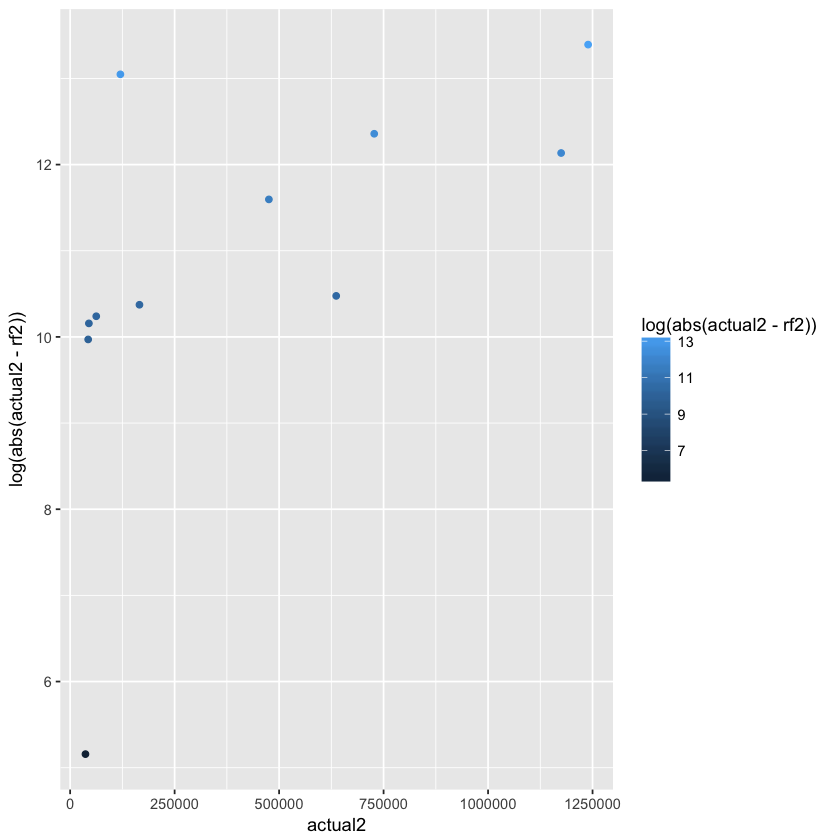

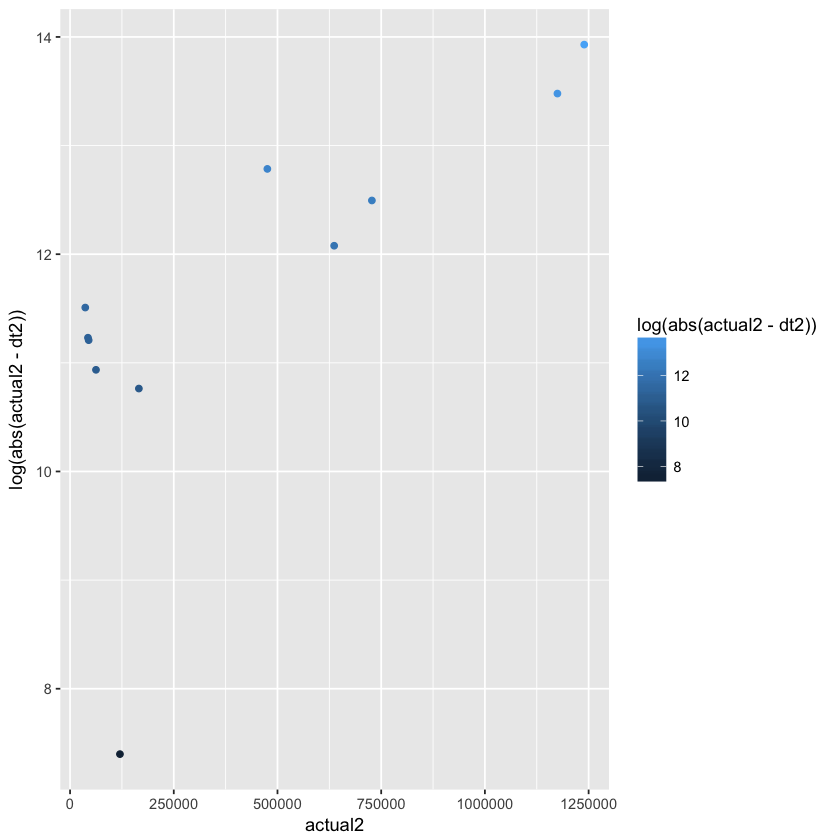

In [90]:
ggplot(errors2, aes(x=actual2, color = log(abs(actual2 -rf2)))) +
  geom_point(aes(y=log(abs(actual2 -rf2))))
ggplot(errors2, aes(x=actual2, color = log(abs(actual2 -dt2)))) +
  geom_point(aes(y=log(abs(actual2 -dt2))))

### Compare errors
Analysis:
In a perfect world you want errors to be as close to 0 as possible. We can see that that the ratios are greater than 1, meaning that the top number is larger than the bottom. f1, g1 and f2, g2 are mean squared error and root squared error for the random forest prediction and decision tree prediction, respectively. Since f2 and g2 are the top numbers, which correspond to decision tree prediction, we can say that the error is greater than the random forest prediction. Therefore, in this case the random forest prediction model is the better one. 

Here, the root node error is being calculated from the test set. We could see earlier that this number is higher compared to the one calculated in from the training set (i.e. 1.1320504579121). This is a normal behavior, because the model will perform well on a training set and will perform less well on a test set. 

One thing can go wrong with the votes won, is the way how the political system works in the United Sates. Because it is not necessarily based on the popular vote, you might be predicting something that does not matter at the end.

In [91]:
f1 <- mse(forest_predict2, test_set2$votes_sum)
g1 <- rmse(forest_predict2, test_set2$votes_sum)

f2 <- mse(tree_predict2, test_set2$votes_sum)
g2 <- rmse(tree_predict2, test_set2$votes_sum)

f2/f1
g2/g1

[1] 2.698603

[1] 1.642742